# Exploratory Data Analysis (EDA)

The purpose of this notebook is to conduct an initial exploration of the housing price dataset, consisting of approximately 250 JSON files from various locations across the United States. The primary objectives of this EDA are to understand the structure of the data, identify important features, detect potential issues, and derive initial insights that will guide the subsequent modeling process.

## Key Steps

- Data Importing
- Data Cleaning and Wrangling
- Visualizations
- Scaling and Cleanup


In [1]:
#Importing libraries used in this notebook
import pandas as pd
import numpy as np
import os
import json
import statistics as stats
from pprint import pprint
import functions_variables as fv

## Data Importing

Load and consolidate approximately 250 JSON files into a single, structured dataset for analysis, ensuring that all relevant data is accurately captured and formatted.

In [2]:
# Load single JSON files to inspect
with open("../data/AK_Juneau_0.json", "r") as file:
    json_data = json.load(file)

json_data

{'status': 200,
 'data': {'total': 8,
  'count': 8,
  'results': [{'primary_photo': {'href': 'https://ap.rdcpix.com/07097d34c98a59ebb799688986ef271dl-m2867511255s-w1024_h768.jpg'},
    'last_update_date': '2023-09-19T20:52:50Z',
    'source': {'plan_id': None,
     'agents': [{'office_name': 'EXP Realty LLC - Southeast Alaska'},
      {'office_name': 'Non-Member Office'}],
     'spec_id': None,
     'type': 'mls'},
    'tags': ['carport',
     'community_outdoor_space',
     'cul_de_sac',
     'family_room',
     'hardwood_floors',
     'hill_or_mountain_view',
     'recreation_facilities',
     'rv_or_boat_parking',
     'basement',
     'garage_1_or_more',
     'two_or_more_stories',
     'big_yard',
     'high_ceiling',
     'efficient',
     'trails',
     'shopping'],
    'permalink': '9453-Herbert-Pl_Juneau_AK_99801_M90744-30767',
    'status': 'sold',
    'list_date': '2023-06-29T21:16:25.000000Z',
    'open_houses': None,
    'description': {'year_built': 1963,
     'baths_3qtr

In [3]:
#Isolate "results" from json only
json_results = json_data["data"]["results"]

# Create dataframe
df = pd.DataFrame(json_results)

#Flatten nested dictionaries in data
df = pd.json_normalize(df.to_dict(orient="records"))

#View summary of created dataframe
df.describe()

,list_price,price_reduced_amount,source.plan_id,source.spec_id,description.year_built,description.baths_full,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.coordinate.lon,location.address.coordinate.lat,primary_photo,source,products,location.address.coordinate,other_listings
count,3.000000,1.0,0.0,0.0,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000,1.0,4.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,0.0
mean,601650.000000,45000.0,NaN,NaN,1963.500000,2.000000,7935.000000,2001.500000,2.000000,1.500000,1.0,3.250000,-134.550124,58.362838,NaN,NaN,NaN,NaN,NaN
std,213858.989757,NaN,NaN,NaN,33.689761,0.816497,2323.751493,1289.025084,0.816497,0.707107,NaN,1.258306,0.104973,0.041129,NaN,NaN,NaN,NaN,NaN
min,415000.000000,45000.0,NaN,NaN,1920.000000,1.000000,5875.000000,950.000000,1.000000,1.000000,1.0,2.000000,-134.649067,58.304573,NaN,NaN,NaN,NaN,NaN
25%,484975.000000,45000.0,NaN,NaN,1952.250000,1.750000,6675.500000,1268.750000,1.750000,1.250000,1.0,2.750000,-134.607557,58.349106,NaN,NaN,NaN,NaN,NaN
50%,554950.000000,45000.0,NaN,NaN,1966.000000,2.000000,7476.000000,1598.000000,2.000000,1.500000,1.0,3.000000,-134.573718,58.375301,NaN,NaN,NaN,NaN,NaN
75%,694975.000000,45000.0,NaN,NaN,1977.250000,2.250000,8965.000000,2330.750000,2.250000,1.750000,1.0,3.500000,-134.516286,58.389033,NaN,NaN,NaN,NaN,NaN
max,835000.000000,45000.0,NaN,NaN,2002.000000,3.000000,10454.000000,3860.000000,3.000000,2.000000,1.0,5.000000,-134.403991,58.396178,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
df

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.agents,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,other_listings.rdc,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",None,None,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,[{'office_name': 'EXP Realty LLC - Southeast A...,NaN,mls,1963.0,None,2023-09-18,None,2.0,None,None,10454.0,1821.0,2.0,None,None,1.0,NaN,3.0,single_family,True,None,None,None,None,False,None,None,None,None,False,basic_opt_in,"[{'listing_id': '2957241843', 'listing_key': N...",99801,Alaska,-134.593720,58.363950,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935271', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-22,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935192', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958925235', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-08-21,None,NaN,None,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958924367', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/m

In [5]:
# loop over all files and put them into a dataframe
data_folder_path= "../data"

df_list = []

for filename in os.listdir(data_folder_path):
    file_path = f"{data_folder_path}/{filename}"

    #Skip if file is not JSON and is a not a file
    if not filename.lower().endswith(".json") or not os.path.isfile(file_path):
        print(f"Skipping: {filename}...")
        continue

    #Process file data into dataframe
    print(f"Processing: {filename}")
    temp_df = fv.load_json_file(file_path)

    #Add dataframe to list of all dataframes
    df_list.append(temp_df)

#Merge all dataframes in list into single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

combined_df
        


Skipping: .gitkeep...
Skipping: .ipynb_checkpoints...
Processing: AK_Juneau_0.json
Processing: AK_Juneau_1.json
Processing: AK_Juneau_2.json
Processing: AK_Juneau_3.json
Processing: AK_Juneau_4.json
Processing: AL_Montgomery_0.json
Processing: AL_Montgomery_1.json
Processing: AL_Montgomery_2.json
Processing: AL_Montgomery_3.json
Processing: AL_Montgomery_4.json
Processing: AR_LittleRock_0.json
Processing: AR_LittleRock_1.json
Processing: AR_LittleRock_2.json
Processing: AR_LittleRock_3.json
Processing: AR_LittleRock_4.json
Processing: AZ_Phoenix_0.json
Processing: AZ_Phoenix_1.json
Processing: AZ_Phoenix_2.json
Processing: AZ_Phoenix_3.json
Processing: AZ_Phoenix_4.json
Processing: CA_Sacramento_0.json
Processing: CA_Sacramento_1.json
Processing: CA_Sacramento_2.json
Processing: CA_Sacramento_3.json
Processing: CA_Sacramento_4.json
Processing: CO_Denver_0.json
Processing: CO_Denver_1.json
Processing: CO_Denver_2.json
Processing: CO_Denver_3.json
Processing: CO_Denver_4.json
Processing:

C:\Users\jeeva\AppData\Local\Temp\ipykernel_39284\3878277414.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(df_list, ignore_index=True)


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.agents,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,other_listings.rdc,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings,community.advertisers,community.description.name,location.county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",None,None,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,[{'office_name': 'EXP Realty LLC - Southeast A...,NaN,mls,1963.0,NaN,2023-09-18,NaN,2.0,None,NaN,10454.0,1821.0,2.0,None,None,1.0,NaN,3.0,single_family,True,None,None,None,None,False,None,None,None,None,False,basic_opt_in,"[{'listing_id': '2957241843', 'listing_key': N...",99801,Alaska,-134.593720,58.363950,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935271', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958935192', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958925235', 'listing_key': N...",99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,None,None,None,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,True,None,None,None,None,None,None,None,None,None,None,NaN,"[{'listing_id': '2958924367', 'listing_key': N.

## Data Cleaning and Wrangling

In this step, the dataset is refined to ensure accuracy and consistency for analysis. Initial exploration using .info() and .describe() helps identify data types, missing values, and irregularities. Special attention is given to cells containing lists, ensuring they are converted to appropriate scalar values. Rows missing the target variable (sale price) are removed, as they are not useful for prediction. Missing values (NA/None) are assessed column by column—some are filled with logical defaults, while others are dropped based on relevance. Irrelevant columns, are also removed to streamline the dataset for effective modeling.

In [6]:
combined_df.describe()

,list_price,price_reduced_amount,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.coordinate.lon,location.address.coordinate.lat,location.county
count,7.721000e+03,2.484000e+03,7316.000000,566.000000,6.716000e+03,7311.000000,2281.000000,6.991000e+03,7323.000000,7980.000000,4448.000000,6260.000000,7504.000000,7909.000000,7909.000000,0.0
mean,4.341582e+05,2.442704e+04,1968.916074,1.247350,4.126050e+05,1.887430,1.105655,2.510949e+05,1933.848559,2.131203,1.926709,1.567732,3.208289,-92.206522,39.009689,NaN
std,5.514925e+05,7.162396e+04,35.096914,0.463482,6.994308e+05,0.862214,0.413340,5.823820e+06,1339.039206,1.175940,0.878766,0.730969,1.282732,15.888886,4.374553,NaN
min,1.000000e+00,1.000000e+02,1828.000000,1.000000,3.080000e+02,1.000000,1.000000,0.000000e+00,120.000000,0.000000,1.000000,1.000000,0.000000,-157.810583,21.277707,NaN
25%,2.090000e+05,6.000000e+03,1950.000000,1.000000,1.910000e+05,1.000000,1.000000,4.953000e+03,1258.000000,1.000000,1.000000,1.000000,3.000000,-104.971611,35.688084,NaN
50%,3.250000e+05,1.010000e+04,1975.000000,1.000000,3.140000e+05,2.000000,1.000000,7.841000e+03,1635.000000,2.000000,2.000000,1.000000,3.000000,-89.333131,39.698210,NaN
75%,4.999000e+05,2.000000e+04,1997.000000,1.000000,4.700000e+05,2.000000,1.000000,1.263200e+04,2264.000000,3.000000,2.000000,2.000000,4.000000,-78.617690,41.832266,NaN
max,1.250000e+07,2.015999e+06,2024.000000,3.000000,2.706500e+07,8.000000,5.000000,1.676624e+08,32106.000000,9.000000,11.000000,10.000000,12.000000,-71.006343,58.396178,NaN


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 67 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   last_update_date                       8125 non-null   object 
 1   tags                                   7638 non-null   object 
 2   permalink                              8159 non-null   object 
 3   status                                 8159 non-null   object 
 4   list_date                              7752 non-null   object 
 5   open_houses                            0 non-null      object 
 6   branding                               8159 non-null   object 
 7   list_price                             7721 non-null   float64
 8   property_id                            8159 non-null   object 
 9   photos                                 7403 non-null   object 
 10  community                              0 non-null      object 
 11  virt

In [8]:
columns_to_drop = [	
    'last_update_date',
	'permalink',
	'status',
	'open_houses',
	'branding',
	'list_price',
	'property_id',
	'photos',
	'community',
	'virtual_tours',
	'listing_id',
	'price_reduced_amount',
	'matterport',
	'primary_photo.href',
	'source.plan_id',
	'source.agents',
	'source.spec_id',
	'source.type',
	'lead_attributes.show_contact_an_agent',
	'flags.is_new_construction',
	'flags.is_for_rent',
    'flags.is_subdivision',
	'flags.is_contingent',
	'flags.is_price_reduced',
	'flags.is_pending',
	'flags.is_foreclosure',
	'flags.is_plan',
	'flags.is_coming_soon',
	'flags.is_new_listing',
	'products.brand_name',
	'other_listings.rdc',
	'location.address.coordinate.lon',
	'location.address.coordinate.lat',
	'location.address.line',
	'location.street_view_url',
	'location.county.fips_code',
	'primary_photo',
	'source', 
	'products',
	'location.address.coordinate',
	'other_listings',
	'community.advertisers',
	'community.description.name',
	'location.county',
    'description.name',
    'description.baths_1qtr'
]

combined_df = combined_df.drop(columns=columns_to_drop)

In [9]:
#Drop target NaN values from target variable from datset
combined_df = combined_df.dropna(subset=['description.sold_price'])

In [10]:
#Fill missing data bathroom data with 0
combined_df['description.baths_half'] = combined_df['description.baths_half'].fillna(0)
combined_df['description.baths_3qtr'] = combined_df['description.baths_3qtr'].fillna(0)
combined_df['description.baths_full'] = combined_df['description.baths_full'].fillna(0)
combined_df['description.garage'] = combined_df['description.garage'].fillna(0)

In [11]:
#These listings are missing lots of data
combined_df.loc[combined_df['description.type'].isna()]

,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name
2367,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
2403,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
2438,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
2472,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
2505,None,None,NaN,0.0,2023-08-11,359900.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,62711,Illinois,Springfield,IL,Sangamon
2551,None,None,NaN,0.0,2023-09-27,162000.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46226,Indiana,Indianapolis,IN,Marion
2557,None,None,NaN,0.0,2023-08-31,294988.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46235,Indiana,Indianapolis,IN,Marion
2561,None,None,NaN,0.0,2023-08-23,349990.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46239,Indiana,Indianapolis,IN,Marion
2592,None,None,NaN,0.0,2023-09-27,162000.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46226,Indiana,Indianapolis,IN,Marion
2598,None,None,NaN,0.0,2023-08-31,294988.0,0.0,0.0,NaN,NaN,NaN,None,0.0,NaN,NaN,None,46235,Indiana,Indianapolis,IN,Marion


In [12]:
#Drop NaN values from 'type' from dataframe
combined_df = combined_df.dropna(subset=['description.type'])

In [13]:
#Dropping 'type'='other' as that type of property is missing lots of info
combined_df = combined_df[combined_df['description.type'] != 'other']

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6686 entries, 30 to 8158
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tags                          6330 non-null   object 
 1   list_date                     6429 non-null   object 
 2   description.year_built        6041 non-null   float64
 3   description.baths_3qtr        6686 non-null   float64
 4   description.sold_date         6686 non-null   object 
 5   description.sold_price        6686 non-null   float64
 6   description.baths_full        6686 non-null   float64
 7   description.baths_half        6686 non-null   float64
 8   description.lot_sqft          5789 non-null   float64
 9   description.sqft              6061 non-null   float64
 10  description.baths             6556 non-null   float64
 11  description.sub_type          1172 non-null   object 
 12  description.garage            6686 non-null   float64
 13  descrip

In [15]:
combined_df['description.beds'].value_counts()

description.beds
3.0     2865
4.0     1386
2.0     1131
5.0      277
1.0      217
6.0      152
0.0       71
7.0       38
8.0       33
9.0       24
12.0      15
11.0       8
10.0       6
Name: count, dtype: int64

In [16]:
#Set numbers of beds to be the mode by each city for NaN values
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.beds'].at[index]):
        city = combined_df['location.address.city'].at[index]
        combined_df.at[index, 'description.beds'] = stats.mode(combined_df['description.beds'].loc[combined_df['location.address.city'] == city])

In [17]:
#Checking where number of beds is still NaN
combined_df['description.type'].loc[combined_df['description.beds'].isna()].value_counts()

description.type
land             65
single_family     5
mobile            5
Name: count, dtype: int64

In [18]:
#Took land only properties with NaN beds and filled 0

combined_df.loc[combined_df['description.type'] == 'land', 'description.beds'] = 0

#Took land only properties with NaN year_built and filled 0
combined_df.loc[combined_df['description.type'] == 'land','description.year_built'] = 0

In [19]:
#Took 5 mobile home properties with NaN beds and filled as 0
combined_df.loc[(combined_df['description.type'] == 'mobile') & (combined_df['description.beds'].isna()), 'description.beds'] = 0

In [20]:
#Set land NaN values for stories to 0
combined_df.loc[combined_df['description.type'] == 'land', 'description.stories'] = 0

In [21]:
#Checking to see how many stories mobile homes can have
combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'].value_counts()

description.stories
1.0    69
2.0     9
Name: count, dtype: int64

In [22]:
#Filled the mobile homes missing stories with the values already in the DF, applied with a random probability equal to its occurence 
combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'] = combined_df.loc[combined_df['description.type'] == 'mobile', 'description.stories'].apply(lambda x: np.random.choice([1, 2], p=[0.88, 0.12]) if pd.isna(x) else x)

In [23]:
#Replace condo_townhome_rowhome_coop with townhomes
combined_df.loc[combined_df['description.type'] == 'condo_townhome_rowhome_coop', 'description.type'] = 'townhomes'

In [24]:
# set numbers of stories to be the mode by city and property type
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.stories'].at[index]):
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[(combined_df['location.address.city'] == city) & (combined_df['description.type'] == prop_type)])
        if np.isnan(combined_df['description.stories'].at[index]):
            combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[(combined_df['location.county.name'] == county) & (combined_df['description.type'] == prop_type)])
            if np.isnan(combined_df['description.stories'].at[index]):
                combined_df.at[index, 'description.stories'] = stats.mode(combined_df['description.stories'].loc[combined_df['description.type'] == prop_type])
      

In [25]:
#checking what types of properties are still missing stories values
combined_df['description.type'][combined_df['description.stories'].isna()].value_counts()

Series([], Name: count, dtype: int64)

In [26]:
combined_df[['description.type','description.stories']].value_counts()

description.type  description.stories
single_family     1.0                    2359
                  2.0                    2004
condos            1.0                     411
multi_family      2.0                     371
land              0.0                     316
townhomes         2.0                     301
condos            2.0                     167
single_family     3.0                     129
mobile            1.0                     128
townhomes         3.0                     126
condos            3.0                      77
multi_family      3.0                      68
townhomes         1.0                      61
condo             1.0                      52
multi_family      1.0                      25
single_family     4.0                      22
mobile            2.0                      18
multi_family      6.0                      16
apartment         2.0                      15
                  1.0                       5
multi_family      10.0                    

In [27]:
# set year built to be the median by city and property type
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.year_built'].at[index]):
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[(combined_df['location.address.city'] == city) & (combined_df['description.type'] == prop_type)])
        if np.isnan(combined_df['description.year_built'].at[index]):
            combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[(combined_df['location.county.name'] == county) & (combined_df['description.type'] == prop_type)])
            if np.isnan(combined_df['description.year_built'].at[index]):
                combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'].loc[combined_df['location.address.city'] == city])
                if np.isnan(combined_df['description.year_built'].at[index]):
                    combined_df.at[index, 'description.year_built'] = stats.median(combined_df['description.year_built'])

In [28]:
# for properties that arent just land and have no bathrooms entered, the bathrooms are set to the mode of the same property type

for index, rows in combined_df.iterrows():
    if (combined_df.at[index, 'description.baths_full'] == 0) & (combined_df.at[index, 'description.baths_3qtr'] == 0) & (combined_df.at[index, 'description.baths_half'] == 0) & (combined_df.at[index, 'description.type'] != 'land'):
        prop_type = combined_df['description.type'].at[index]
        combined_df.at[index, 'description.baths_full'] = stats.mode(combined_df['description.baths_full'].loc[combined_df['description.type'] == prop_type])
        combined_df.at[index, 'description.baths_3qtr'] = stats.mode(combined_df['description.baths_3qtr'].loc[combined_df['description.type'] == prop_type])
        combined_df.at[index, 'description.baths_half'] = stats.mode(combined_df['description.baths_half'].loc[combined_df['description.type'] == prop_type])

In [29]:
#For properties with 0 'baths', set 'baths' to be equal to the total number of 'baths_full' + 'baths_3qtr' + 'baths_half' at the property
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.baths'].at[index]):
        combined_df.at[index, 'description.baths'] = combined_df.at[index, 'description.baths_full'] + combined_df.at[index, 'description.baths_3qtr'] + combined_df.at[index, 'description.baths_half']

In [30]:
#Trying to find properties where there are still no bathrooms, excluding land
combined_df.loc[(combined_df['description.baths_full'] == 0) & (combined_df['description.baths_3qtr'] == 0) & (combined_df['description.baths_half'] == 0) & (combined_df['description.type'] != 'land')]


,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name
2366,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2402,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2437,None,None,1974.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2471,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2504,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
5640,None,None,2002.0,0.0,2023-10-05,656700.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5642,None,None,2002.0,0.0,2023-10-04,718800.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5647,None,None,2002.0,0.0,2023-09-28,550000.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43201,Ohio,Columbus,OH,Franklin
5650,None,None,2002.0,0.0,2023-09-22,824800.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5654,None,None,2002.0,0.0,2023-09-12,748900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin


In [31]:
#Checking to see what other kind of info 'condo' type is missing
combined_df.loc[combined_df['description.type'] == 'condo']

,tags,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.garage,description.stories,description.beds,description.type,location.address.postal_code,location.address.state,location.address.city,location.address.state_code,location.county.name
2366,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2402,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2437,None,None,1974.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2471,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
2504,None,None,1989.0,0.0,2023-08-14,119900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,62702,Illinois,Springfield,IL,Sangamon
5640,None,None,2002.0,0.0,2023-10-05,656700.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5642,None,None,2002.0,0.0,2023-10-04,718800.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5647,None,None,2002.0,0.0,2023-09-28,550000.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43201,Ohio,Columbus,OH,Franklin
5650,None,None,2002.0,0.0,2023-09-22,824800.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin
5654,None,None,2002.0,0.0,2023-09-12,748900.0,0.0,0.0,NaN,NaN,0.0,None,0.0,1.0,3.0,condo,43228,Ohio,Columbus,OH,Franklin


In [32]:
#Switched condo to condos to condense types and also fill missing data using stats
combined_df.loc[combined_df['description.type'] == 'condo', 'description.type'] = 'condos'

In [33]:
#Used mean to fill in missing 'lot_sqft' according to property type and location
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.lot_sqft'].at[index]):
        prop_type = combined_df['description.type'].at[index]
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.address.city'] == city)])
        if np.isnan(combined_df['description.lot_sqft'].at[index]):
            combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.county.name'] == county)])
            if np.isnan(combined_df['description.lot_sqft'].at[index]):
                combined_df.at[index, 'description.lot_sqft'] = stats.mean(combined_df['description.lot_sqft'].loc[combined_df['description.type'] == prop_type])

In [34]:
#Seeing what types of properties are still missing 'lot_sqft'
combined_df.loc[combined_df['description.lot_sqft'].isna(), 'description.type'].value_counts()

description.type
condos           480
single_family    181
mobile            88
land              83
townhomes         37
multi_family      28
Name: count, dtype: int64

In [35]:
#Used mean to fill in missing 'sqft' according to property type and area
for index, rows in combined_df.iterrows():
    if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
        prop_type = combined_df['description.type'].at[index]
        city = combined_df['location.address.city'].at[index]
        county = combined_df['location.county.name'].at[index]
        combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.address.city'] == city)].mean()
        if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
            combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[(combined_df['description.type'] == prop_type) & (combined_df['location.county.name'] == county)].mean()
            if np.isnan(combined_df['description.sqft'].at[index]) & (combined_df['description.type'].at[index] != 'land'):
                combined_df.at[index, 'description.sqft'] = combined_df['description.sqft'].loc[combined_df['description.type'] == prop_type].mean()

In [36]:
#Seeing what types of properties are still missing 'sqft'
combined_df.loc[combined_df['description.sqft'].isna(), 'description.type'].value_counts()

description.type
land              315
duplex_triplex      5
Name: count, dtype: int64

In [37]:
combined_df['description.type'].value_counts()

description.type
single_family     4514
condos             708
townhomes          491
multi_family       486
land               316
mobile             146
apartment           20
duplex_triplex       5
Name: count, dtype: int64

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6686 entries, 30 to 8158
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tags                          6330 non-null   object 
 1   list_date                     6429 non-null   object 
 2   description.year_built        6686 non-null   float64
 3   description.baths_3qtr        6686 non-null   float64
 4   description.sold_date         6686 non-null   object 
 5   description.sold_price        6686 non-null   float64
 6   description.baths_full        6686 non-null   float64
 7   description.baths_half        6686 non-null   float64
 8   description.lot_sqft          5789 non-null   float64
 9   description.sqft              6366 non-null   float64
 10  description.baths             6686 non-null   float64
 11  description.sub_type          1172 non-null   object 
 12  description.garage            6686 non-null   float64
 13  descrip

### Dealing with Tags

The dataset includes several categorical variables, such as tags, city, and state, which require careful handling. One-Hot Encoding (OHE) is considered for these features, but this can lead to a high-dimensional dataset if not managed properly. To mitigate this, low-frequency tags that contribute little to the model's predictive power are identified and removed, reducing the number of columns and simplifying the data. This approach ensures that the model remains efficient while retaining meaningful categorical information.

In [39]:
combined_df = fv.encode_tags(combined_df, 1500)

In [40]:
#Remove sub_type column as it has a lot of NULLs
cleaned_combined_df = combined_df.copy()
cleaned_combined_df.drop(columns=['description.sub_type'], inplace=True)

#Determine which columns have NULLs in them
columns_with_nulls = cleaned_combined_df.columns[cleaned_combined_df.isna().any()].to_list()
print(f"Columns with NULLs: {columns_with_nulls}")

#Keep list_date & lot_sqft, drop the rest
columns_to_check_for_nulls = columns_with_nulls.copy()
columns_to_check_for_nulls.remove('description.lot_sqft')
print(f"Columns to clean nulls from: {columns_to_check_for_nulls}")

cleaned_combined_df = cleaned_combined_df.dropna(subset=columns_to_check_for_nulls)
print(f"Remaining columns: {cleaned_combined_df.columns.to_list()}")
cleaned_combined_df.info()

Columns with NULLs: ['list_date', 'description.lot_sqft', 'description.sqft', 'description.beds', 'location.address.city', 'location.county.name']
Columns to clean nulls from: ['list_date', 'description.sqft', 'description.beds', 'location.address.city', 'location.county.name']
Remaining columns: ['list_date', 'description.year_built', 'description.baths_3qtr', 'description.sold_date', 'description.sold_price', 'description.baths_full', 'description.baths_half', 'description.lot_sqft', 'description.sqft', 'description.baths', 'description.garage', 'description.stories', 'description.beds', 'location.address.postal_code', 'location.address.state', 'location.address.city', 'location.address.state_code', 'location.county.name', 'basement', 'central_air', 'community_outdoor_space', 'dishwasher', 'fireplace', 'forced_air', 'hardwood_floors', 'laundry_room', 'recreation_facilities', 'shopping', 'washer_dryer', 'apartment', 'condos', 'duplex_triplex', 'land', 'mobile', 'multi_family', 'single

In [41]:
#Convert dates to UNIX Timestamps
cleaned_combined_df["list_date"] = pd.to_datetime(cleaned_combined_df["list_date"], format="ISO8601", utc=True)
cleaned_combined_df["list_date"] = cleaned_combined_df["list_date"].astype('int64') / 10**9

cleaned_combined_df["description.sold_date"] = pd.to_datetime(cleaned_combined_df["description.sold_date"], utc=True)
cleaned_combined_df["description.sold_date"] = cleaned_combined_df["description.sold_date"].astype('int64') / 10**9

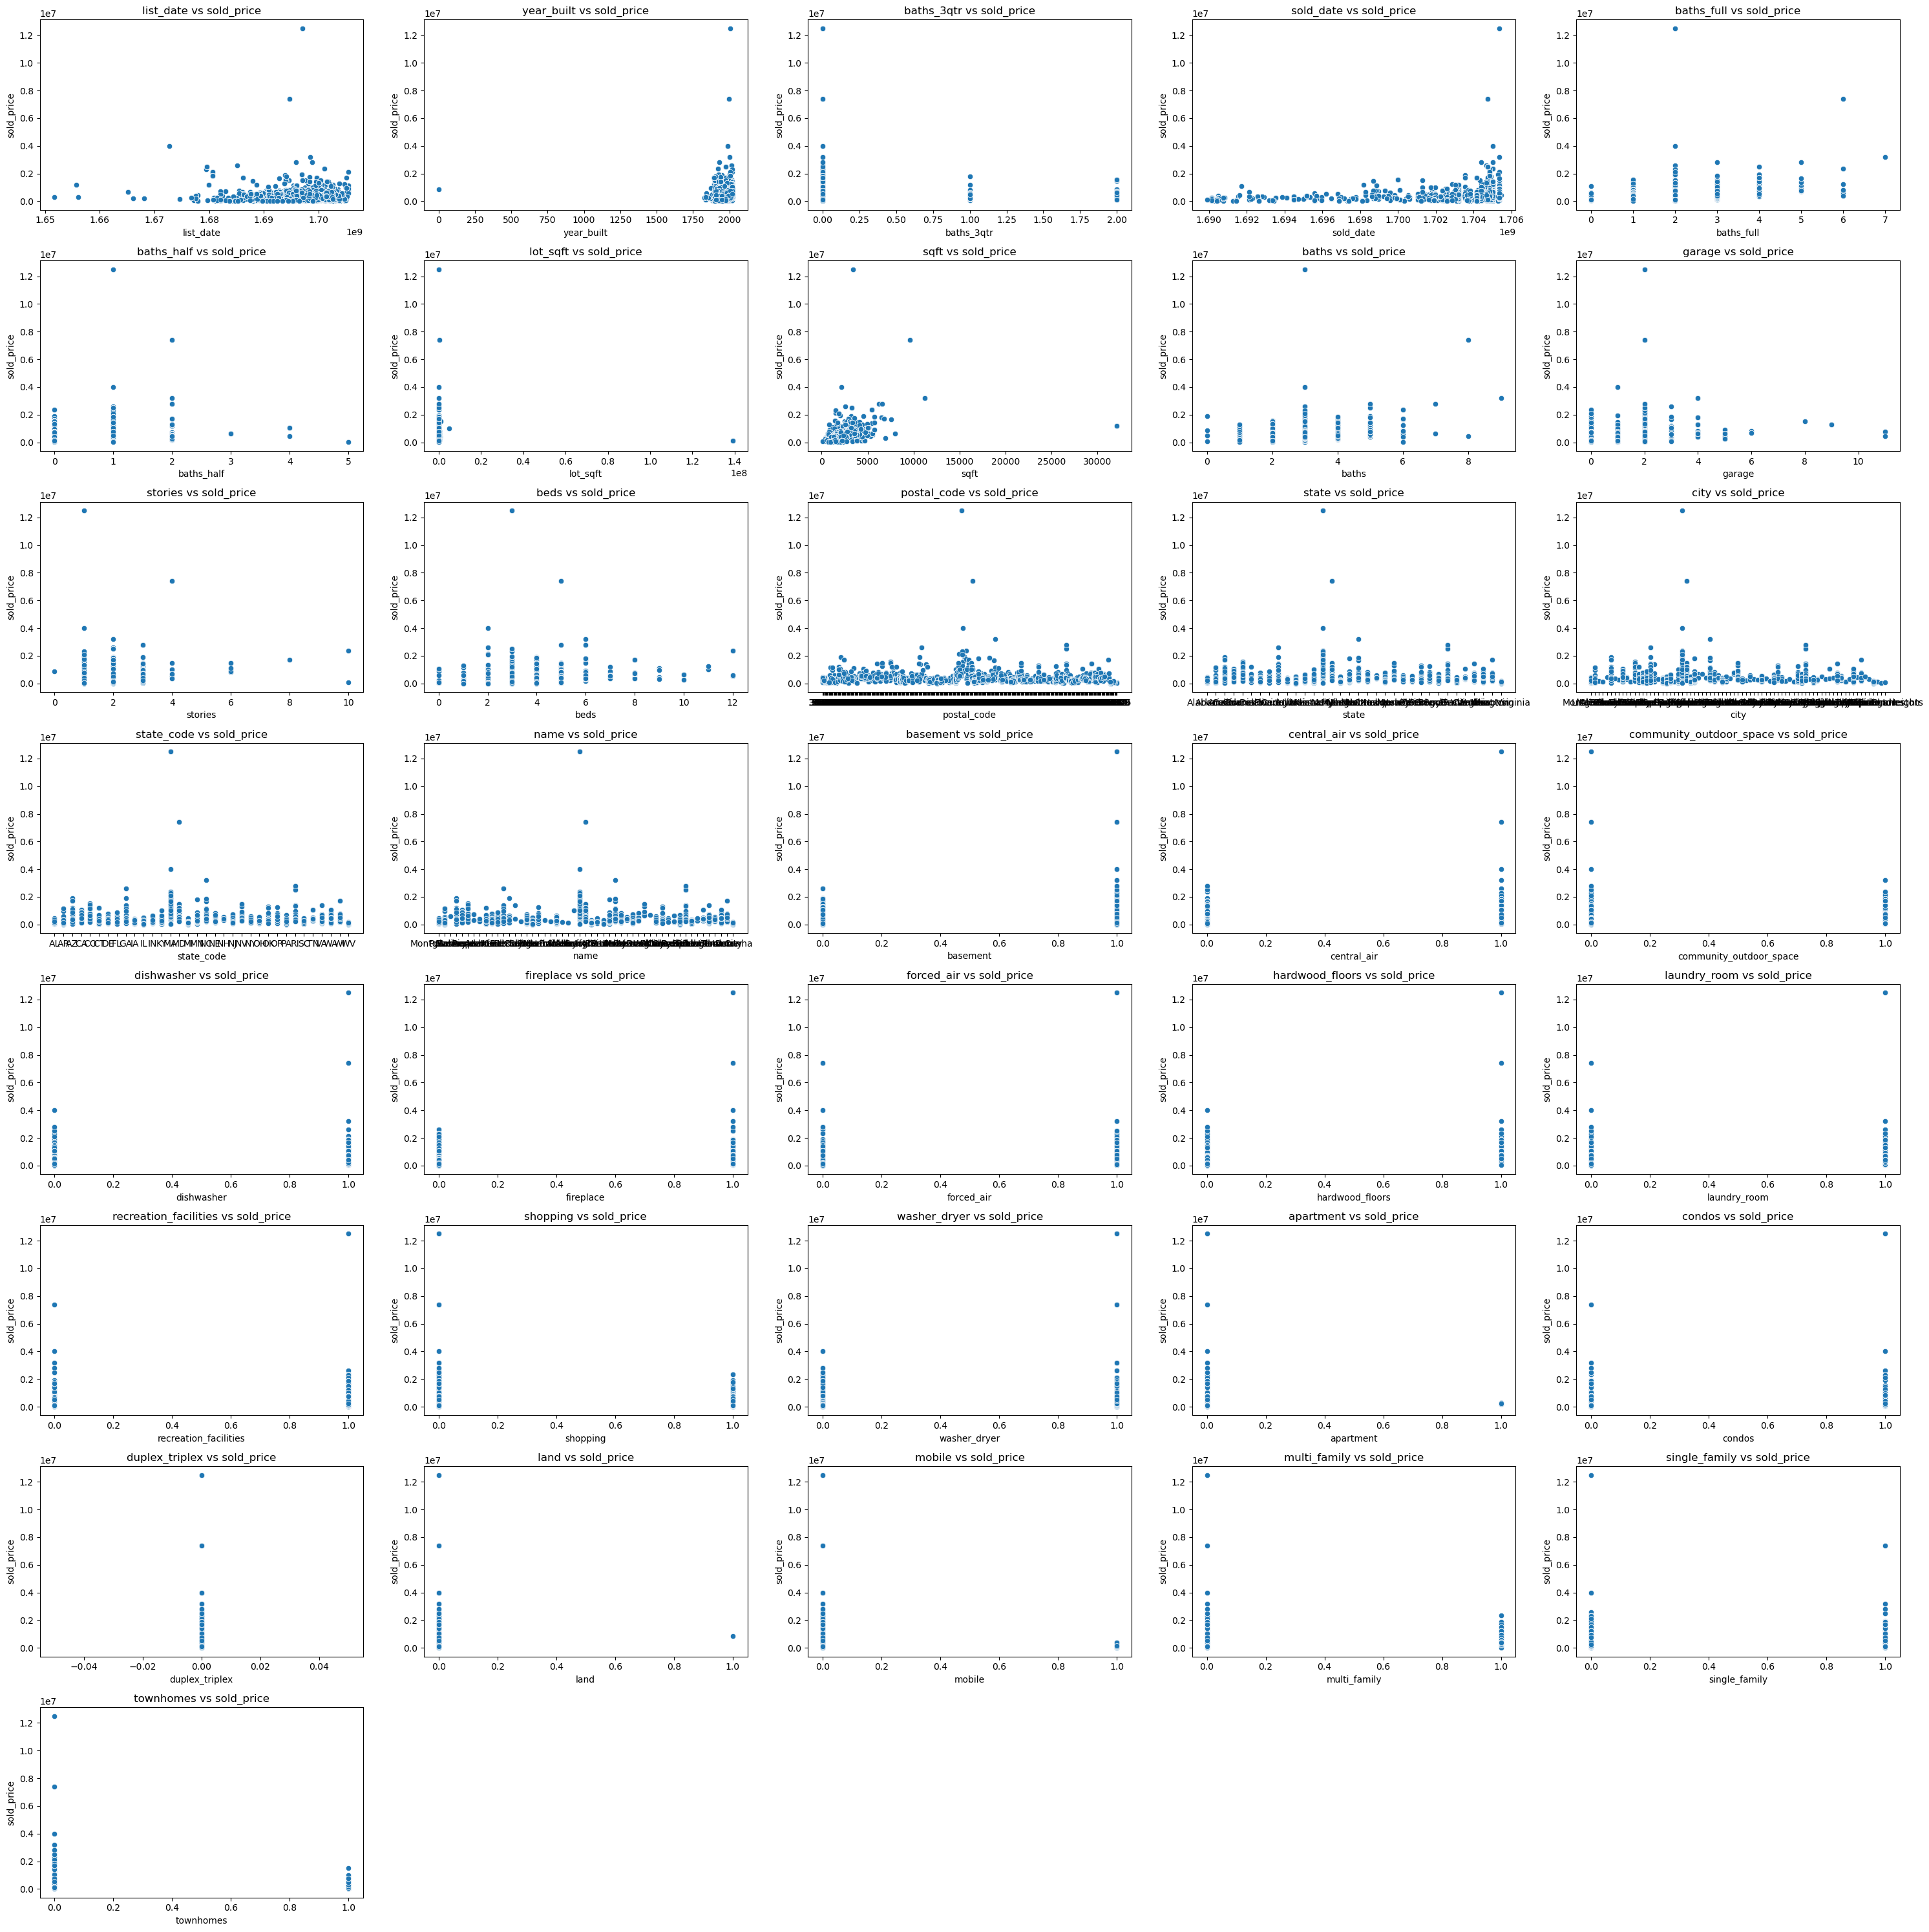

In [42]:
#Visualize cleaned dataframe
fv.vis_subplots(
    cleaned_combined_df.drop(columns=['description.sold_price']), 
    cleaned_combined_df['description.sold_price'])

(4940, 37)


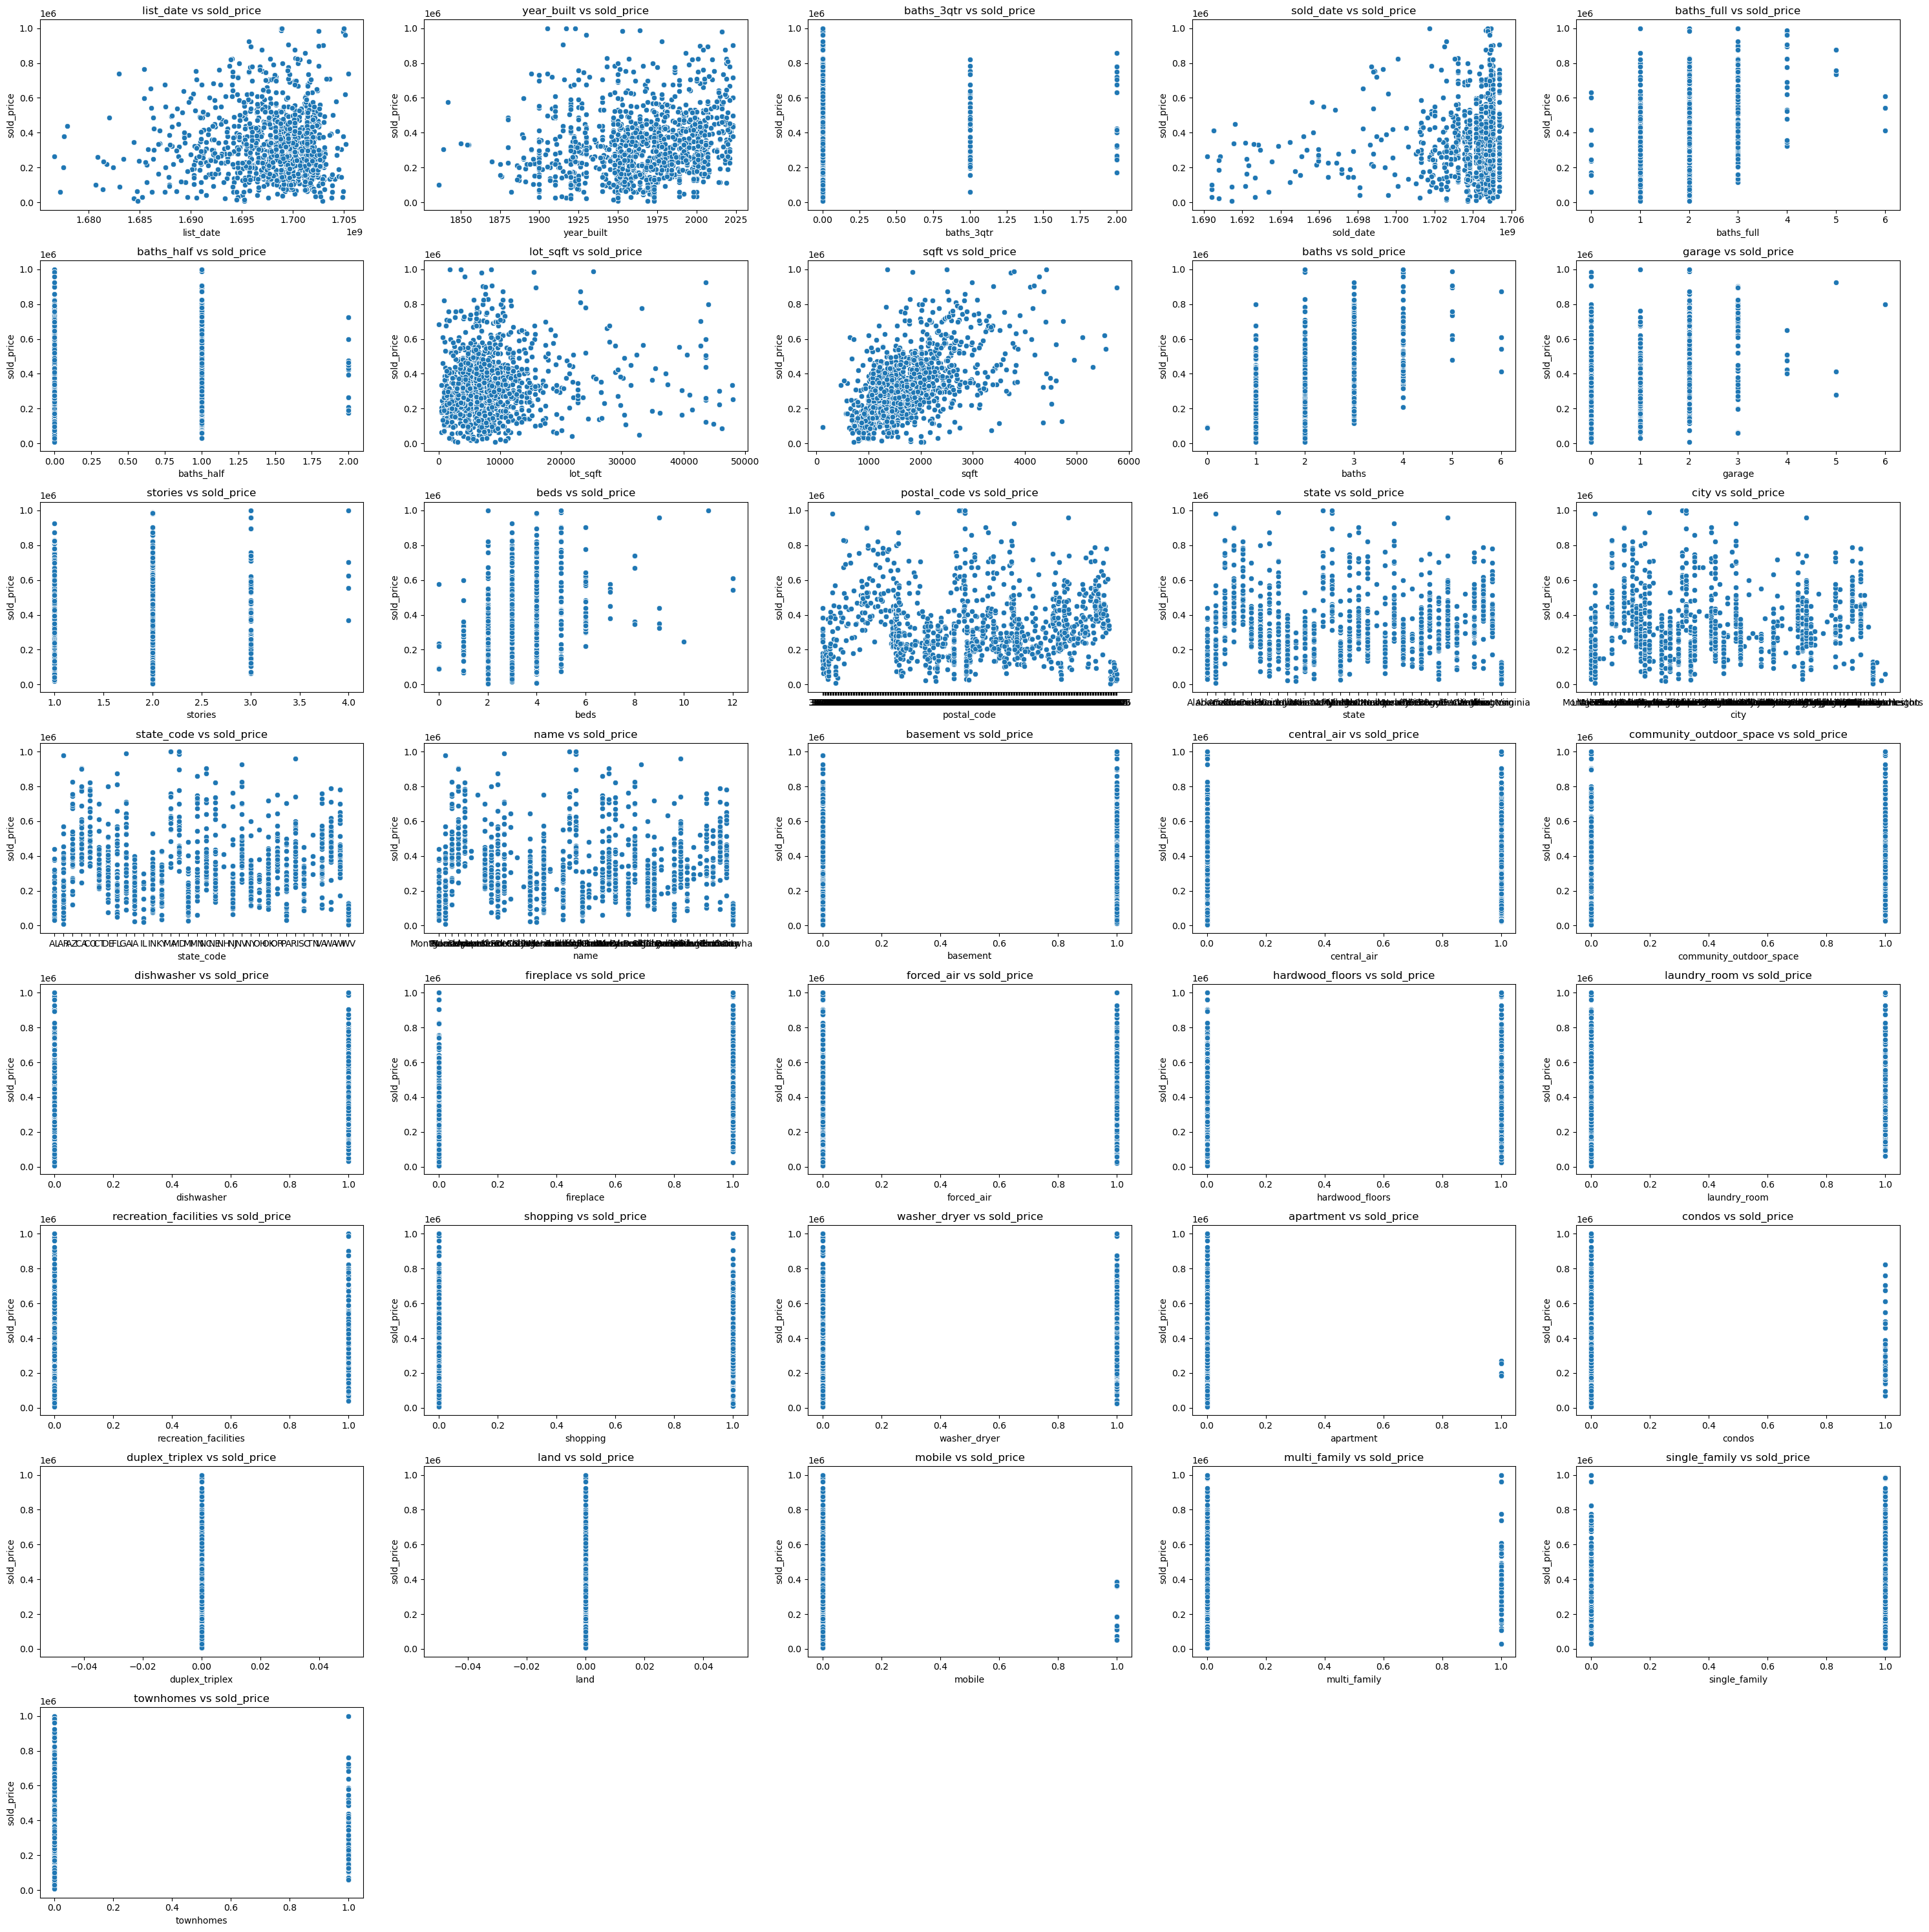

In [43]:
#Filter outliers
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["list_date"] > 1670000000]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.sold_price"] <= 1000000]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.sold_price"] != 0]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.year_built"] != 0]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.baths_half"] < 5]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.lot_sqft"] < 50000]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.sqft"] < 6500]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.garage"] <= 6]
cleaned_combined_df = cleaned_combined_df.loc[cleaned_combined_df["description.stories"] < 5]

print(cleaned_combined_df.shape)

#Review subplots
fv.vis_subplots(
    cleaned_combined_df.drop(columns=['description.sold_price']), 
    cleaned_combined_df['description.sold_price'])

In [44]:
cleaned_combined_df['list_date'].min()

1676670365.0

In [45]:
cleaned_combined_df = cleaned_combined_df.drop(columns=['location.address.state_code','location.county.name', 'location.address.postal_code'])

In [46]:
clean_df = cleaned_combined_df.copy()
clean_df.head()

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.state,location.address.city,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes
30,1.703009e+09,1998.0,0.0,1.705363e+09,129900.0,2.0,0.0,11761.0,1478.0,2.0,2.0,1.0,3.0,Alabama,Montgomery,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
31,1.699626e+09,1945.0,0.0,1.705363e+09,88500.0,2.0,0.0,6534.0,1389.0,2.0,1.0,2.0,4.0,Alabama,Montgomery,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
32,1.703009e+09,1969.0,0.0,1.705363e+09,145000.0,2.0,0.0,17424.0,2058.0,2.0,0.0,1.0,3.0,Alabama,Montgomery,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
33,1.688576e+09,1955.0,0.0,1.705363e+09,65000.0,2.0,0.0,9712.0,1432.0,2.0,0.0,1.0,3.0,Alabama,Montgomery,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34,1.698602e+09,1984.0,0.0,1.705018e+09,169000.0,2.0,0.0,10890.0,1804.0,2.0,0.0,1.0,3.0,Alabama,Montgomery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Extra Data

We looked up interest rates in the US so that we could add it to our existing data, and see what kind of impact it had

In [47]:
#Loading interest rate data into DF
interest = pd.read_csv('../data/fed-funds-rate-historical-chart.csv', header=8)

#indiscriminately drop rows since dataset dates back before Unix Epoch Time
interest = interest.drop(interest.index[:20000])

#Convert time to unix timestamp
interest['date'] = pd.to_datetime(interest['date'], format='ISO8601', utc=True)
interest['date'] = interest["date"].astype('int64') / 10**9

#Drop info from before 2023 and NaNs
interest = interest.loc[interest['date'] > 1672549200]
interest = interest.dropna()

#Create a new group whenever the interest value changes
interest['range'] = (interest['value'] != interest['value'].shift()).cumsum()

#Create a start and end time for each group
interest = interest.groupby("range").agg(
    start_time=("date", "first"),
    end_time=("date", "last"),
    value=("value", "first")
).reset_index(drop=True)

#Set the end time of one group to match the start time of the next
interest['end_time'] = interest['start_time'].shift(-1)

#Drop the last group
interest = interest.drop(index=19)

In [48]:
#Set the interest rate equal to the value from the interest DF with the corresponding date range
clean_df['interest_rate'] = clean_df["list_date"].apply(
                            lambda x: interest.loc[(interest["start_time"] <= x) & (interest["end_time"] > x), "value"].values[0]
                            if any((interest["start_time"] <= x) & (interest["end_time"] > x)) else None
                            )

### Dealing with Cities

Since housing prices vary significantly across cities and states, it's important to retain location information without relying on One-Hot Encoding (OHE), which could lead to a high-dimensional dataset. Instead, Target Encoding is used, where each city is represented by the mean sale price calculated from the training data. This approach provides an informed estimate of housing prices by location without explicitly encoding cities.

To prevent data leakage, the dataset is first split into training and testing sets. Mean prices are computed from the training data and then joined to the test set. For cities present in the test set but absent in the training set, missing values are filled with the overall mean sale price to maintain consistency and avoid introducing biases.

In [49]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(columns='description.sold_price')
y = clean_df['description.sold_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
#Adding the target variable back since we need to calculate the mean
X_train = X_train.join(y_train)

In [51]:
#creating a mean of the entire train_set in case there is a city/state in the test_set not found in train_set
default_mean = X_train['description.sold_price'].mean()

#Creating dictionaries where the keys are the cities/states and values will be filled in by the mean
cities = X_train['location.address.city'].unique().tolist()
city_dict = {key:None for key in cities}
states = X_train['location.address.state'].unique().tolist()
state_dict = {key:None for key in states}

#Filling in the mean for each city/state in the dictionaries
for key in city_dict.keys():
    city_dict[key] = X_train.loc[X_train['location.address.city'] == key, 'description.sold_price'].mean()

for key in state_dict.keys():
    state_dict[key] = X_train.loc[X_train['location.address.state'] == key, 'description.sold_price'].mean()

In [52]:
#Replacing the city and state strings with the encoded values in the train_set
for index, rows in X_train.iterrows():
    city = X_train['location.address.city'].at[index]
    state = X_train['location.address.state'].at[index]
    X_train.at[index, 'location.address.city'] = city_dict[city]
    X_train.at[index, 'location.address.state'] = state_dict[state]

In [53]:
#Replacing the city and state strings with the encoded values in the test_set
for index, rows in X_test.iterrows():
    #Making sure that the city is a string, otherwise if run multiple times, it would replace everything with the default mean
    if isinstance(X_test['location.address.city'].at[index], str):
        city = X_test['location.address.city'].at[index]
        #If the city is in the dictionary, it will replace the string with the value, otherwise it will fill in the default mean
        try:
            X_test.at[index, 'location.address.city'] = city_dict[city]
        except:
            X_test.at[index, 'location.address.city'] = default_mean
    else: continue 

    #Same as above, but for state
    if isinstance(X_test['location.address.state'].at[index], str):
        state = X_test['location.address.state'].at[index]
        try:   
            X_test.at[index, 'location.address.state'] = state_dict[state]
        except:
            X_test.at[index, 'location.address.state'] = default_mean
    else: continue 

In [54]:
X_train = X_train.drop(columns='description.sold_price')

In [55]:
combined_df.to_csv('../data/preprocessed/combined_df.csv')
X_train.to_csv('../data/preprocessed/X_train.csv')
X_test.to_csv('../data/preprocessed/X_test.csv')
y_train.to_csv('../data/preprocessed/y_train.csv')
y_test.to_csv('../data/preprocessed/y_test.csv')

## EDA/ Visualization

This stage focuses on visually exploring the dataset to uncover patterns, relationships, and potential issues. Distributions of numerical variables are analyzed to understand the shape of the data and identify outliers, with transformations considered for highly skewed features to improve model performance. Scatterplots between numerical variables and the target (sale price) help reveal correlations and trends. 

Additionally, the dataset is reviewed for redundant information, such as overlapping features related to room counts, to simplify the dataset and enhance model clarity.

In [56]:
X_train.head()

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.state,location.address.city,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes,interest_rate
1156,1.693617e+09,1913.000000,0.0,1.703117e+09,3.0,0.0,8712.0,2498.0,3.0,0.0,2.0,7.0,343289.047619,343289.047619,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,5.33
1539,1.700188e+09,2019.000000,0.0,1.704845e+09,2.0,0.0,44867.0,1155.0,2.0,0.0,2.0,3.0,313479.055118,313479.055118,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5.33
5978,1.698100e+09,2003.000000,0.0,1.705018e+09,2.0,0.0,10890.0,2167.0,2.0,3.0,1.0,3.0,283243.661417,255832.258065,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,5.33
2914,1.702169e+09,2000.007812,0.0,1.703808e+09,1.0,0.0,1750.0,864.0,1.0,0.0,1.0,2.0,240292.777778,240292.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.33
6416,1.698380e+09,1940.000000,0.0,1.705018e+09,1.0,0.0,3920.0,728.0,1.0,0.0,1.0,2.0,239801.964286,239801.964286,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,5.33


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3458 entries, 1156 to 5885
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   list_date                3458 non-null   float64
 1   description.year_built   3458 non-null   float64
 2   description.baths_3qtr   3458 non-null   float64
 3   description.sold_date    3458 non-null   float64
 4   description.baths_full   3458 non-null   float64
 5   description.baths_half   3458 non-null   float64
 6   description.lot_sqft     3458 non-null   float64
 7   description.sqft         3458 non-null   float64
 8   description.baths        3458 non-null   float64
 9   description.garage       3458 non-null   float64
 10  description.stories      3458 non-null   float64
 11  description.beds         3458 non-null   float64
 12  location.address.state   3458 non-null   object 
 13  location.address.city    3458 non-null   object 
 14  basement                 3

In [58]:
X_train.describe()

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes,interest_rate
count,3.458000e+03,3458.000000,3458.000000,3.458000e+03,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.000000,3458.0,3458.0,3458.000000,3458.000000,3458.000000,3458.00000,3458.000000
mean,1.697664e+09,1965.344689,0.081261,1.703634e+09,1.808560,0.317235,9088.461828,1801.656689,2.203297,1.060150,1.604396,3.283979,0.502892,0.563042,0.516773,0.471949,0.448236,0.461828,0.347889,0.286293,0.195200,0.248988,0.287160,0.003181,0.038172,0.0,0.0,0.006940,0.078369,0.777617,0.09572,5.306319
std,4.517784e+06,34.724620,0.325454,2.548171e+06,0.766161,0.490285,7799.560459,795.595559,0.883114,1.036433,0.627407,1.184845,0.500064,0.496081,0.499791,0.499285,0.497385,0.498613,0.476369,0.452093,0.396412,0.432489,0.452502,0.056319,0.191640,0.0,0.0,0.083032,0.268790,0.415907,0.29425,0.091273
min,1.676670e+09,1836.000000,0.000000,1.690157e+09,0.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,4.570000
25%,1.695677e+09,1944.000000,0.000000,1.703635e+09,1.000000,0.000000,4684.000000,1256.000000,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.00000,5.330000
50%,1.698863e+09,1969.000000,0.000000,1.704413e+09,2.000000,0.000000,7405.000000,1632.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.00000,5.330000
75%,1.700846e+09,1994.000000,0.000000,1.704931e+09,2.000000,1.000000,10803.000000,2164.000000,3.000000,2.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.00000,5.330000
max,1.705443e+09,2023.000000,2.000000,1.705363e+09,6.000000,2.000000,47960.000000,5766.000000,6.000000,6.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.00000,5.330000


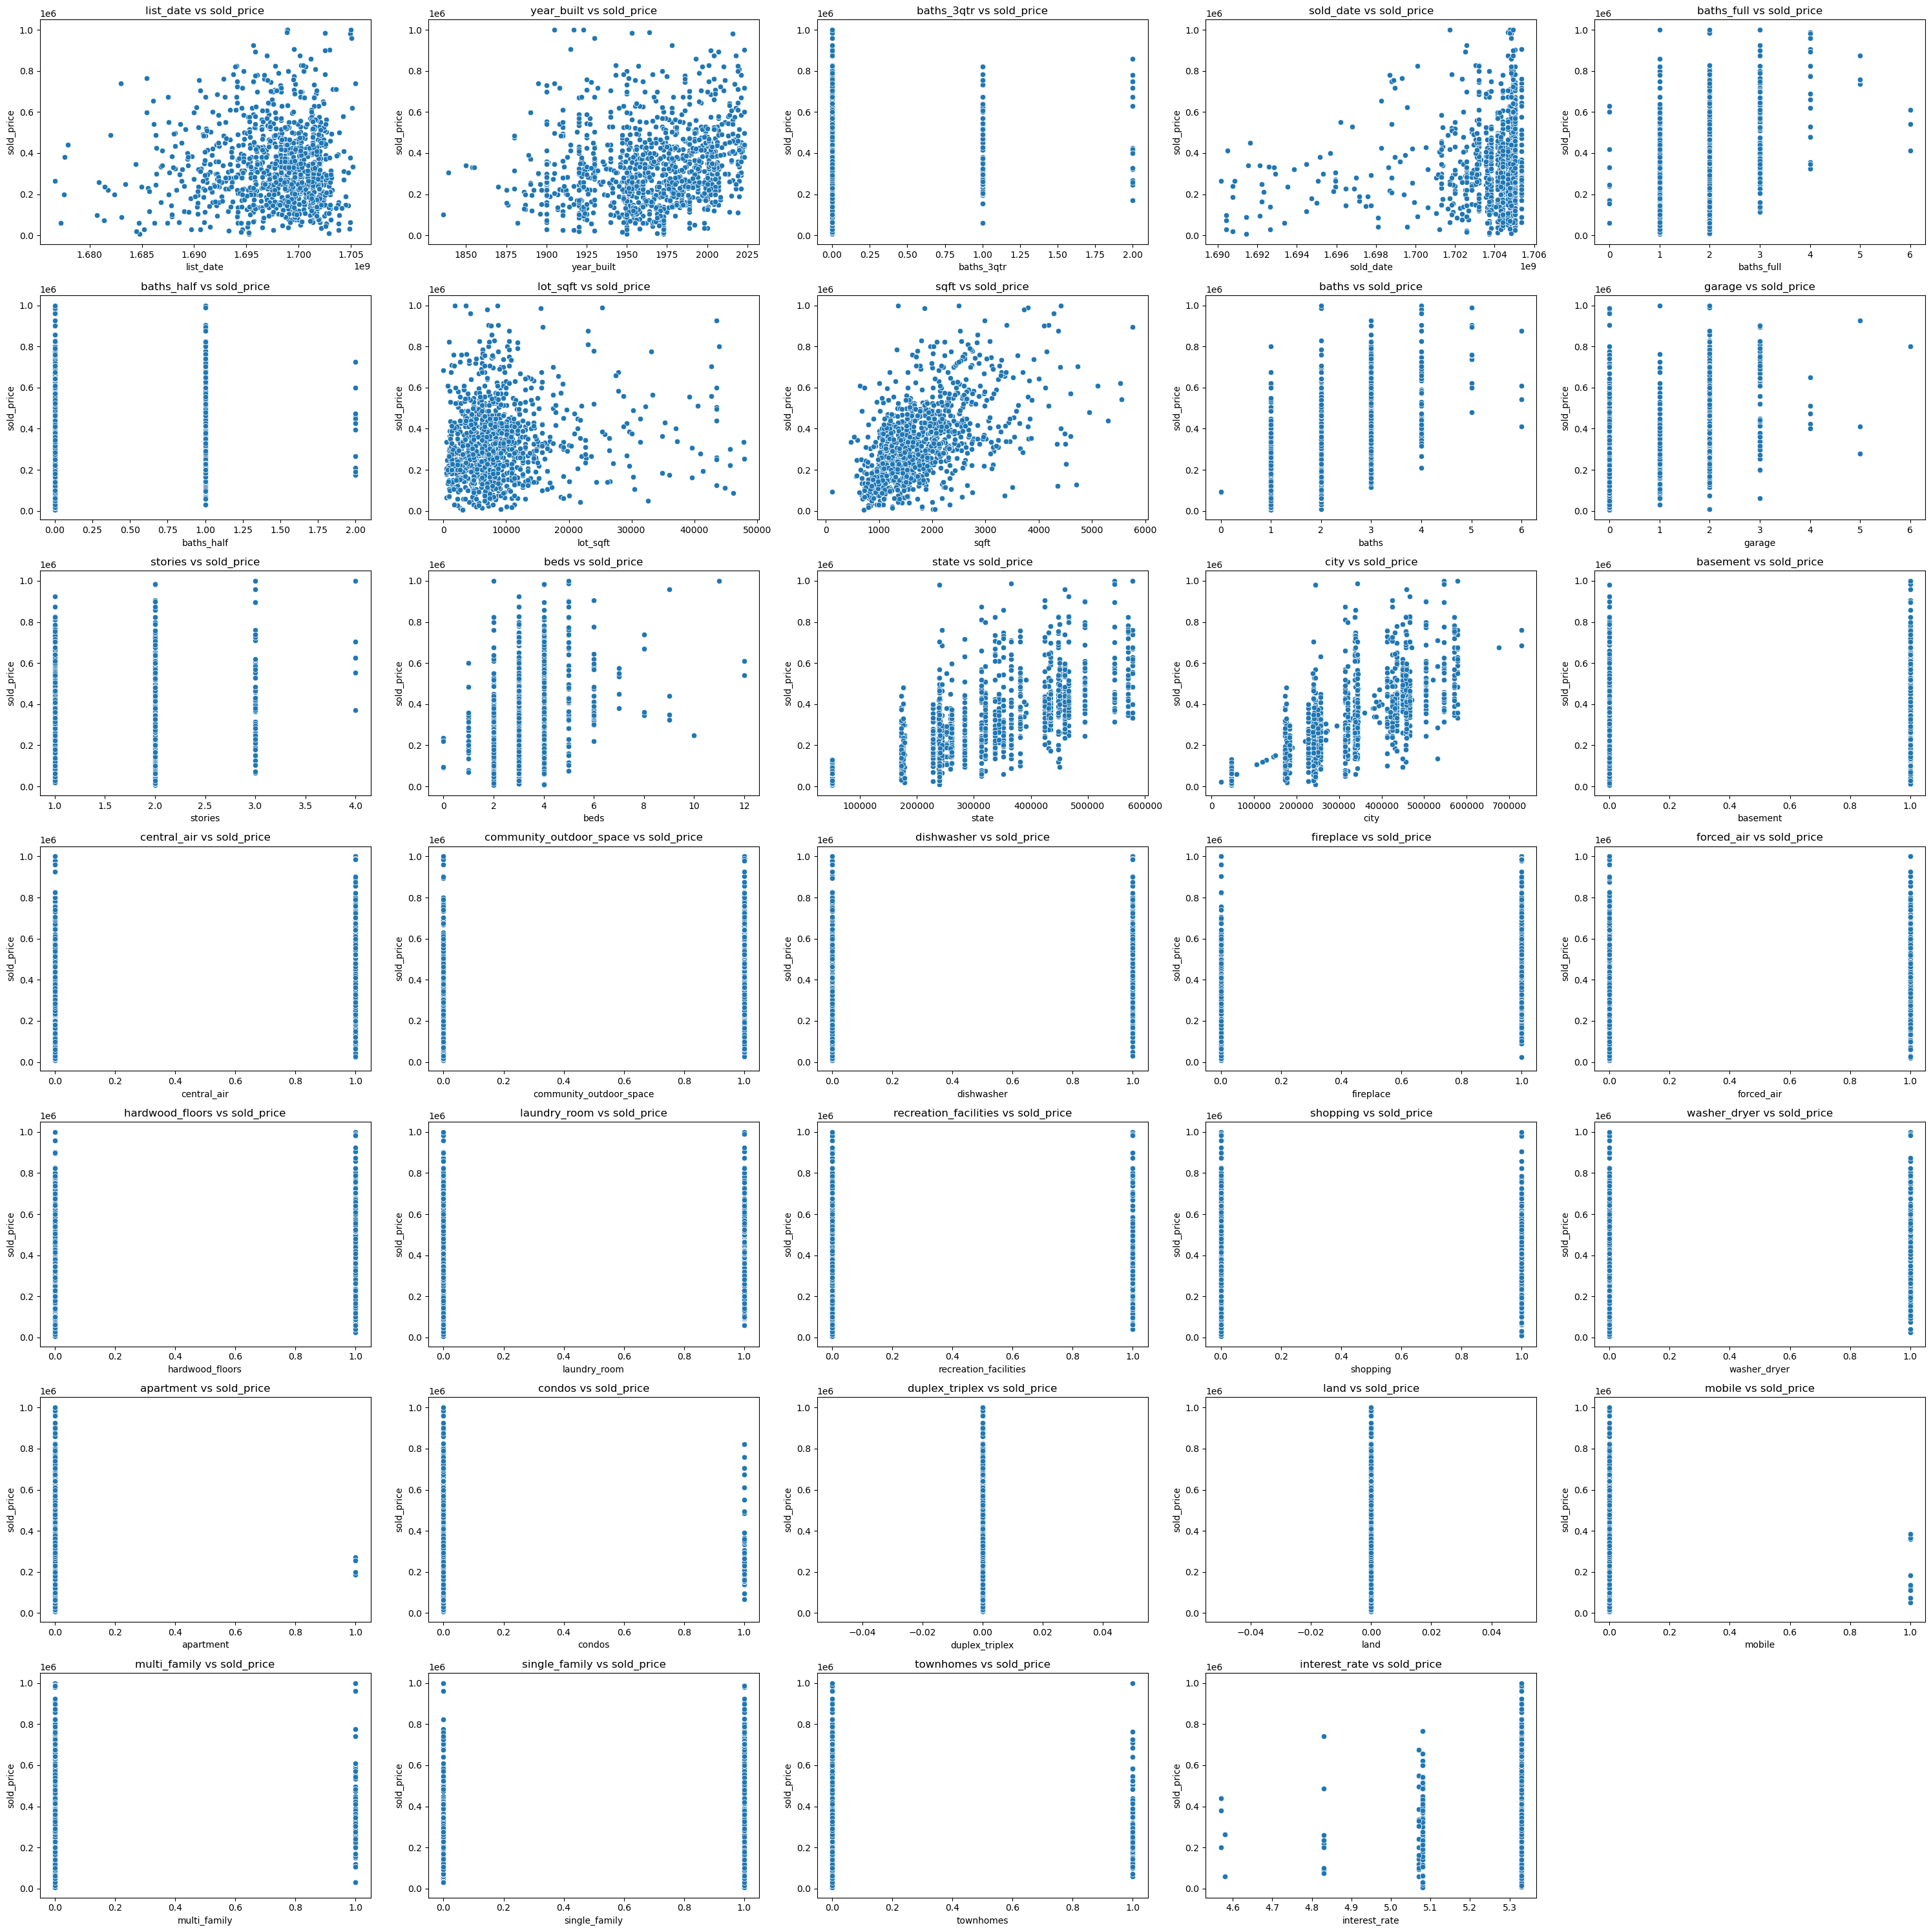

In [59]:
fv.vis_subplots(X_train, y_train)

## Scaling and Finishing Up

In this final step, numerical features are scaled to ensure consistency and improve model performance, especially for algorithms sensitive to feature magnitude. 

Once preprocessing is complete, the cleaned and scaled dataset is saved for future use. To maintain organization, a new processed/ subfolder within the data directory is created, ensuring a clear separation between raw and processed data. This structured approach simplifies workflow management and ensures the data is ready for the next stages of model development.

In [60]:
from sklearn.preprocessing import StandardScaler

X_train.head()

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.state,location.address.city,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes,interest_rate
1156,1.693617e+09,1913.000000,0.0,1.703117e+09,3.0,0.0,8712.0,2498.0,3.0,0.0,2.0,7.0,343289.047619,343289.047619,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,5.33
1539,1.700188e+09,2019.000000,0.0,1.704845e+09,2.0,0.0,44867.0,1155.0,2.0,0.0,2.0,3.0,313479.055118,313479.055118,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5.33
5978,1.698100e+09,2003.000000,0.0,1.705018e+09,2.0,0.0,10890.0,2167.0,2.0,3.0,1.0,3.0,283243.661417,255832.258065,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,5.33
2914,1.702169e+09,2000.007812,0.0,1.703808e+09,1.0,0.0,1750.0,864.0,1.0,0.0,1.0,2.0,240292.777778,240292.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.33
6416,1.698380e+09,1940.000000,0.0,1.705018e+09,1.0,0.0,3920.0,728.0,1.0,0.0,1.0,2.0,239801.964286,239801.964286,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,5.33


In [61]:
X_train

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.state,location.address.city,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes,interest_rate
1156,1.693617e+09,1913.000000,0.0,1.703117e+09,3.0,0.0,8712.0,2498.0,3.0,0.0,2.0,7.0,343289.047619,343289.047619,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,5.33
1539,1.700188e+09,2019.000000,0.0,1.704845e+09,2.0,0.0,44867.0,1155.0,2.0,0.0,2.0,3.0,313479.055118,313479.055118,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5.33
5978,1.698100e+09,2003.000000,0.0,1.705018e+09,2.0,0.0,10890.0,2167.0,2.0,3.0,1.0,3.0,283243.661417,255832.258065,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,5.33
2914,1.702169e+09,2000.007812,0.0,1.703808e+09,1.0,0.0,1750.0,864.0,1.0,0.0,1.0,2.0,240292.777778,240292.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5.33
6416,1.698380e+09,1940.000000,0.0,1.705018e+09,1.0,0.0,3920.0,728.0,1.0,0.0,1.0,2.0,239801.964286,239801.964286,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,1.695424e+09,1958.000000,0.0,1.704413e+09,1.0,0.0,8276.0,1538.0,1.0,2.0,1.0,3.0,434089.0,435382.55814,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,5.33
1894,1.697128e+09,2005.000000,0.0,1.704758e+09,2.0,1.0,1307.0,1529.0,3.0,0.0,2.0,3.0,365049.173554,343749.519231,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,5.33
1125,1.696025e+09,1900.000000,0.0,1.704931e+09,3.0,0.0,6098.0,3238.0,3.0,0.0,2.0,6.0,343289.047619,343289.047619,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.33
1751,1.698703e+09,1981.000000,0.0,1.704672e+09,3.0,0.0,1917.0,1900.0,3.0,0.0,2.0,3.0,365049.173554,343749.519231,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,5.33


In [67]:
#Define transformer
scaler = StandardScaler()

#Fit and transform the data
X_train = scaler.fit_transform(X_train)

#Transform test data using scaler fit to training data to prevent leakage
X_test = scaler.transform(X_test)


X_train_scaled

,list_date,description.year_built,description.baths_3qtr,description.sold_date,description.baths_full,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.garage,description.stories,description.beds,location.address.state,location.address.city,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes,interest_rate
1156,-0.895943,-1.507641,-0.249721,-0.202803,1.555304,-0.647136,-0.048274,0.875374,0.902282,-1.023031,0.630630,3.136748,0.062813,0.059770,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.259493
1539,0.558809,1.545390,-0.249721,0.475429,0.249906,-0.647136,4.587914,-0.812913,-0.230238,-1.023031,0.630630,-0.239711,-0.194719,-0.185285,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.259493
5978,0.096615,1.084555,-0.249721,0.543252,0.249906,-0.647136,0.231013,0.459274,-0.230238,1.871930,-0.963462,-0.239711,-0.455926,-0.659174,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0.259493
2914,0.997399,0.998373,-0.249721,0.068490,-1.055492,-0.647136,-0.941018,-1.178730,-1.362758,-1.023031,-0.963462,-1.083826,-0.826984,-0.786918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.259493
6416,0.158613,-0.729982,-0.249721,0.543252,-1.055492,-0.647136,-0.662756,-1.349696,-1.362758,-1.023031,-0.963462,-1.083826,-0.831224,-0.790952,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.259493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,-0.495852,-0.211543,-0.249721,0.305871,-1.055492,-0.647136,-0.104183,-0.331443,-1.362758,0.906943,-0.963462,-0.239711,0.847245,0.816831,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0.259493
1894,-0.118669,1.142159,-0.249721,0.441517,0.249906,1.392788,-0.997824,-0.342757,0.902282,-1.023031,0.630630,-0.239711,0.250802,0.063555,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0.259493
1125,-0.362792,-1.882069,-0.249721,0.509340,1.555304,-0.647136,-0.383470,1.805630,0.902282,-1.023031,0.630630,2.292633,0.062813,0.059770,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.259493
1751,0.230045,0.450907,-0.249721,0.407606,1.555304,-0.647136,-0.919603,0.123628,0.902282,-1.023031,0.630630,-0.239711,0.250802,0.063555,0,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0.259493


In [63]:
#Recreating Dataframes from the scaled data
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [64]:
#Resetting OHE columns that got scaled
OHE_columns = ['basement','central_air', 'community_outdoor_space', 'dishwasher', 'fireplace', 'forced_air', 'hardwood_floors', 'laundry_room','recreation_facilities', 'shopping', 'washer_dryer', 'apartment',
       'condos', 'duplex_triplex', 'land', 'mobile', 'multi_family','single_family', 'townhomes']

X_train_scaled[OHE_columns] = X_train[OHE_columns]
X_test_scaled[OHE_columns] =  X_test[OHE_columns]           

In [65]:
#Write final preprocessed dataframes to CSV file
X_train_scaled.to_csv('../data/preprocessed/X_train_scaled.csv')
X_test_scaled.to_csv('../data/preprocessed/X_test_scaled.csv')

In [66]:
X_test_scaled[OHE_columns].head()

,basement,central_air,community_outdoor_space,dishwasher,fireplace,forced_air,hardwood_floors,laundry_room,recreation_facilities,shopping,washer_dryer,apartment,condos,duplex_triplex,land,mobile,multi_family,single_family,townhomes
1529,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2942,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2102,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4790,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7402,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
